In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 4.1

## Obiettivo dell'esercizio

L'obiettivo dell'esercizio è quello di simulare un gas approssimabile come ideale, al fine di verificare che, all'equilibrio, il **modulo delle velocità** delle particelle sia distribuito secondo la **distribuzione di Maxwell-Boltzmann**.

A tal fine, ho utilizzato il programma di **dinamica molecolare** fornito, a cui ho aggiunto una funzione per misurare quante particelle ricadessero in determinati intervalli di velocità, in modo da costruire un istogramma che approssimasse la curva teorica di distribuzione.

---

## Impostazioni del sistema e metodo di simulazione

Il programma di dinamica molecolare richiede parametri di input per definire le proprietà del sistema. I parametri rilevanti utilizzati sono:

- **Temperatura**: `T = 1.1`
- **Numero di particelle**: `NPart = 108`

La **configurazione iniziale** del sistema è contenuta nel file `config.xyz`, fornito insieme al codice.

Le **velocità iniziali** sono generate casualmente: per ogni particella, **ogni componente della velocità** viene estratta da una **distribuzione gaussiana centrata in** $\mu$ = 0 e con **varianza** $\sigma ^2$ = T.

### Metodo di simulazione

Il sistema è stato fatto evolvere per **20 blocchi di simulazione**, ognuno composto da **2000 passi** temporali ottenuti evolvendo il sistema tramite l'algoritmo di Verlet. Questo ha permesso di raggiungere una configurazione di equilibrio con certezza, superando la fase transiente iniziale.

La statistica finale sulle misure è stata ottenuta considerando **tutte le misure** effettuate fino all'ultimo blocco.

Il miglior risultato (normalizzato) per ogni bin dell'istogramma con il suo errore è riportato nel file "OUTPUT/pofv.dat" e presentati in fig 4.1.1

---

In [3]:
# Parametri
n_bins = 30               # numero di bin dell'istogramma approssimante
equilibration_blocks = 0  # numero di blocchi da saltare per l'equilibrazione

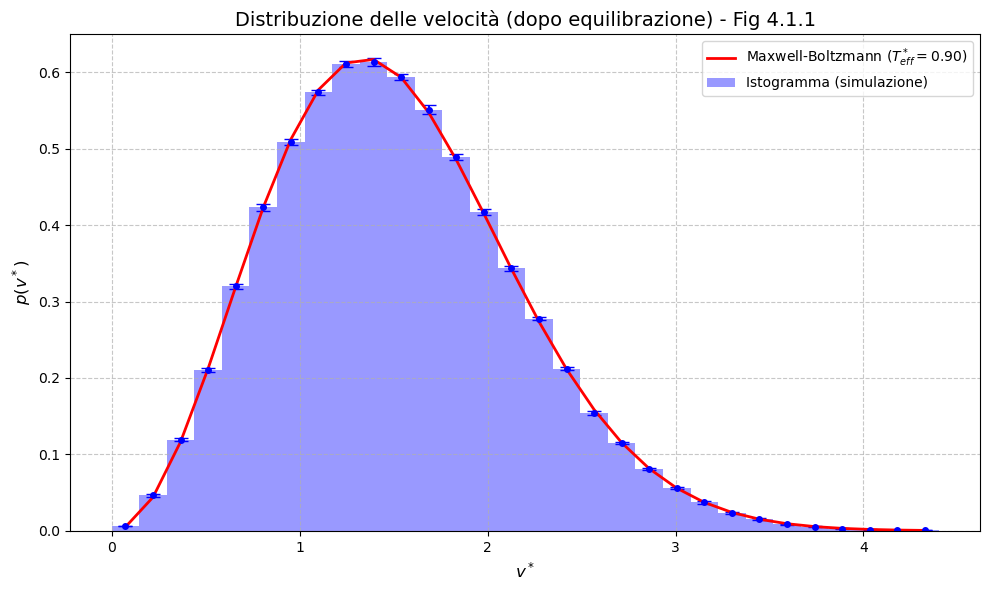

In [21]:
# Legge i dati da pofv.dat
data = np.loadtxt('Esercizio_4_1/OUTPUT/pofv.dat')[equilibration_blocks * n_bins:, :]
v = data[:, 0]      # valore centrale del bin v*
p_sim = data[:, 1]  # media dei blocchi all'ultimo blocco
p_err = data[:, 2]  # errori

# Calcola T_eff a partire dai dati dell'energia cinetica
kinetic_data = np.loadtxt("Esercizio_4_1/OUTPUT/kinetic_energy.dat", usecols=2)[equilibration_blocks:]
K_avg = np.mean(kinetic_data)
T_eff = (2.0 / 3.0) * K_avg

# Distribuzione teorica Maxwell-Boltzmann in unità ridotte
p_theory = (1.0 / ((2 * np.pi * T_eff) ** 1.5)) * 4 * np.pi * v**2 * np.exp(-(v**2) / (2 * T_eff))

# Calcola larghezza del bin per la rappresentazione istogramma
bin_width = v[1] - v[0]  # supponendo bin equispaziati

# Plot
plt.figure(figsize=(10, 6))

# Istogramma simulato (barre verticali)
plt.bar(v, p_sim, width=bin_width, alpha=0.4, color='blue', label='Istogramma (simulazione)')

# Barre d'errore sopra i punti
plt.errorbar(v, p_sim, yerr=p_err, fmt='o', markersize=4, capsize=5, color='blue')

# Curva teorica
plt.plot(v, p_theory, 'r-', linewidth=2, label=f'Maxwell-Boltzmann ($T_{{eff}}^*={T_eff:.2f}$)')

# Etichette e layout
plt.xlabel(r'$v^*$', fontsize=12)
plt.ylabel(r'$p(v^*)$', fontsize=12)
plt.title('Distribuzione delle velocità (dopo equilibrazione) - Fig 4.1.1', fontsize=14)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

## Osservazioni e conclusioni

- Si vede ad occhio come le barre dell'istogramma approssimino bene l'area della distribuzione;
- I dati simulati sono **statisticamente compatibili entro una sigma** di incertezza, suggerendo una buona concordanza con la distribuzione di Maxwell-Boltzmann;
- Il **picco della distribuzione** si osserva attorno a **$𝑣^∗ = 1.5$**, in accordo con il valore teorico più probabile della distribuzione:

<div align="center">
\\( v^*_{mp} = \sqrt{2T^*} \\)
</div>

### Conclusione

Una configurazione di **alta entropia**, come quella di un gas in equilibrio, corrisponde a una distribuzione delle velocità (e quindi delle energie) conforme alla **distribuzione di Maxwell-Boltzmann**.

Questo risultato conferma numericamente che tale distribuzione descrive accuratamente un **gas classico** all'equilibrio.


# Esercizio 4.2

## Obiettivo dell'esercizio

Nell'esercizio 4.2 si va ad indagare meglio come un sistema ordinato a bassa entropia evolva ad un sistema disordinato ad alta entropia. Quello che ho fatto è quindi partire da una configurazione cristallina impostata a metà scatola per le posizioni. Per la configurazione iniziale delle velocità ho imposto una distribuzione che dia una configurazione iniziale molto precisa.

Cosi facendo, voglio mostrare che anche partendo da una situazione molto ordinata, la fase fuori dall'equilibrio forza il gas a portarsi in una configurazione per cui si verifichi numericamente la MW. In altre parole si mostra che l'entropia dell'universo aumenta fino al suo massimo.

---
## Impostazioni del sistema e metodo di simulazione

La configurazione iniziale della posizioni è un cristallo FCC occupante metà scatola del sistema. La configurazione è presente nel file config.fcc.

Per la configurazione inziale delle velocità ho imposto una distribuzione a delta di dirac centrata in un valore $v_T$. Ciò equivale a dire che i valori di velocità che può assumere inizialmente una particella possono essere in modulo solo pari a $v_T$.

> **Nota**: Per ottenere una configurazione di questo tipo bisogna considerare che le velocità delle particelle si intendono rispetto al centro di massa, quindi al netto del drift del sistema. Affinchè la distribuzione del modulo delle velocità sia una delta di dirac centrata sul particolare valore termico ho avuto l'accortezza di impostare la velocità iniziale di ogni particella solo lungo una dimensione ciclicamente: in termini pratici le 108 particelle sono divise in gruppi da 3 con velocità lungo l'asse x, la seconda lungo l'asse y e la terza lungo l'asse z. La variazione ciclica è per evitare di introdurre bias del sistema. Inoltre, affinchè il drift risulti nullo, le particelle con velocità lungo una certa dimensione devono essere per metà con verso positivo e metà con verso negativo.  

Di seguito presento degli istogrammi dei moduli delle velocità delle particelle a tempi diversi della simulazione. I primi 4 grafici li ho ottenuti nella fase iniziale in cui è evidente come il transiente di fuori equilibrio faccia convergere la distribuzione verso la MB. Sono grafici "empirici": non hanno rilevanza statistica, ma utili a vedere visivamente lo spostamento iniziale.

I successivi 2 grafici li ho ottenuti effettuando le medie di blocco al blocco 10 e 20

In [4]:
# Calcola T_eff per la nuova configurazione iniziale
kinetic_data = np.loadtxt("Esercizio_4_2/OUTPUT/kinetic_energy.dat", usecols=2)[equilibration_blocks:]
K_avg = np.mean(kinetic_data)
T_eff = (2.0 / 3.0) * K_avg

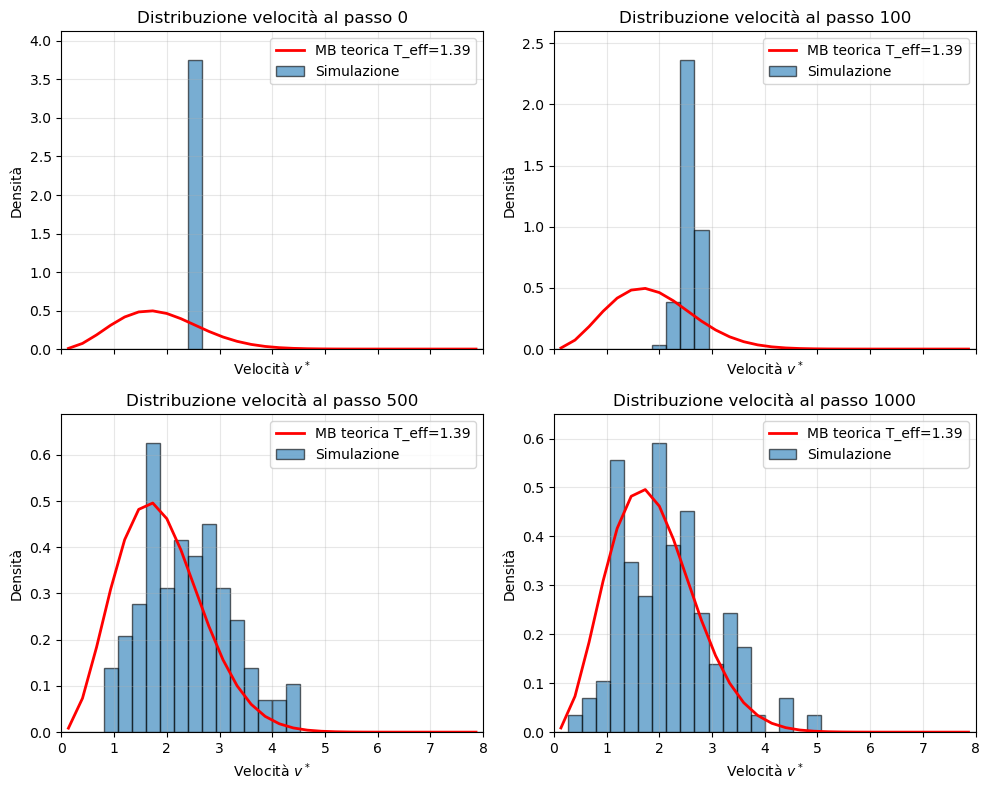

In [5]:
filenames = [
    'Esercizio_4_2/OUTPUT/pofv_first.dat',
    'Esercizio_4_2/OUTPUT/pofv_second.dat',
    'Esercizio_4_2/OUTPUT/pofv_third.dat',
    'Esercizio_4_2/OUTPUT/pofv_fourth.dat'
]

# Parametri dell'istogramma
xmin, xmax = 0.0, 8.0
nbins = 30
bins = np.linspace(xmin, xmax, nbins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# Calcolo della distribuzione teorica di Maxwell–Boltzmann
v = bin_centers
prefactor = 4 * np.pi * v**2 / ((2 * np.pi * T_eff)**1.5)
p_theory = prefactor * np.exp(-v**2 / (2 * T_eff))

# Pre-calcolo del massimo normalizzato per ciascun file
max_vals = []
for filename in filenames:
    data = np.loadtxt(filename)
    counts, _ = np.histogram(data, bins=bins)
    normalized = counts / (len(data) * bin_width)
    max_vals.append(max(normalized.max(), p_theory.max()))

# Creazione della figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=False)
axes = axes.flatten()

for idx, filename in enumerate(filenames):
    data = np.loadtxt(filename)
    counts, _ = np.histogram(data, bins=bins)
    normalized = counts / (len(data) * bin_width)

    ax = axes[idx]
    # Istogramma normalizzato
    ax.bar(bin_centers, normalized, width=bin_width, alpha=0.6, edgecolor='black', label='Simulazione')
    # Curva Maxwell-Boltzmann teorica
    ax.plot(v, p_theory, 'r-', linewidth=2, label=f'MB teorica T_eff={T_eff:.2f}')
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, max_vals[idx] * 1.1)
    ax.set_title(filename.split('/')[-1])
    ax.grid(alpha=0.3)
    ax.legend()
    ax.set_xlabel('Velocità $v^*$')
    ax.set_ylabel('Densità')

axes[0].set_title("Distribuzione velocità al passo 0 - Fig. 4.2.1")
axes[1].set_title("Distribuzione velocità al passo 100 - Fig. 4.2.2")
axes[2].set_title("Distribuzione velocità al passo 500 - Fig. 4.2.3")
axes[3].set_title("Distribuzione velocità al passo 1000 - Fig. 4.2.4")
plt.tight_layout()
plt.show()

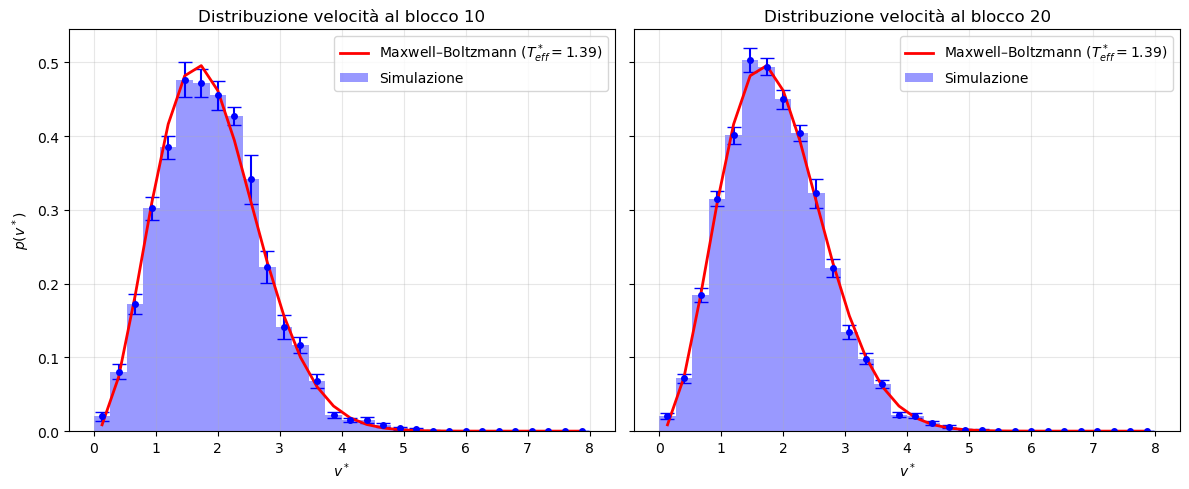

In [6]:
# File contenente entrambi i dataset
filename = 'Esercizio_4_2/OUTPUT/pofv.dat'

# --- Leggi e separa i dati prima/dopo "STOP" ---
with open(filename, 'r') as f:
    lines = f.readlines()

# Trova l'indice della riga "STOP"
stop_index = next(i for i, line in enumerate(lines) if line.strip() == "STOP")

# Righe prima e dopo "STOP"
data1_lines = [line for line in lines[:stop_index] if len(line.strip().split()) == 3]
data2_lines = [line for line in lines[stop_index + 1:] if len(line.strip().split()) == 3]

# Converti in array numpy
data1 = np.loadtxt(data1_lines)[equilibration_blocks * n_bins:, :]
data2 = np.loadtxt(data2_lines)[equilibration_blocks * n_bins:, :]

# Setup subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
titles = ['Distribuzione velocità al blocco 10 - Fig. 4.2.5', 'Distribuzione velocità al blocco 20 - Fig. 4.2.6']

# Loop su entrambi i set di dati
for i, data in enumerate([data1, data2]):
    v = data[:, 0]
    p_sim = data[:, 1]
    p_err = data[:, 2]
    bin_width = v[1] - v[0]

    # Curva teorica MB
    p_theory = (1.0 / ((2 * np.pi * T_eff) ** 1.5)) * 4 * np.pi * v**2 * np.exp(-(v**2) / (2 * T_eff))

    ax = axes[i]
    ax.bar(v, p_sim, width=bin_width, alpha=0.4, color='blue', label='Simulazione')
    ax.errorbar(v, p_sim, yerr=p_err, fmt='o', markersize=4, capsize=5, color='blue')
    ax.plot(v, p_theory, 'r-', linewidth=2, label=f'Maxwell–Boltzmann ($T_{{eff}}^*={T_eff:.2f}$)')
    ax.set_title(titles[i])
    ax.set_xlabel(r'$v^*$')
    ax.grid(alpha=0.3)
    if i == 0:
        ax.set_ylabel(r'$p(v^*)$')
    ax.legend()

plt.tight_layout()
plt.show()

Di seguito invece riporto i grafici delle medie di blocco e della media cumulativa delle quantità energetiche: energia cinetica, energia potenziale ed energia totale.

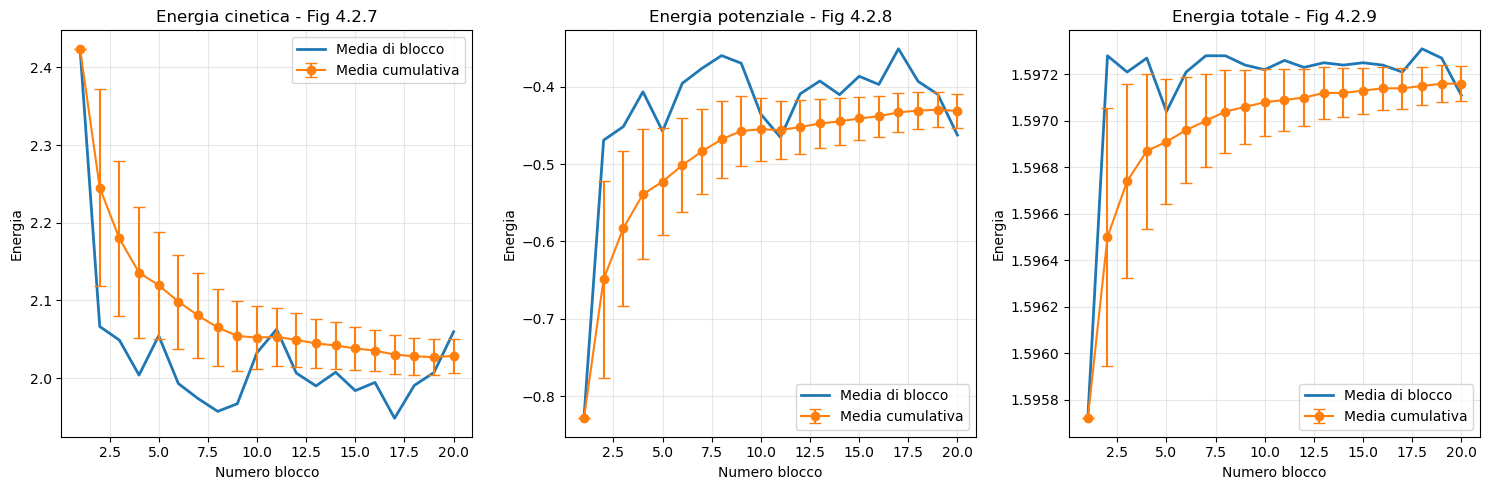

In [37]:
filenames = [
    'Esercizio_4_2/OUTPUT/kinetic_energy.dat',
    'Esercizio_4_2/OUTPUT/potential_energy.dat',
    'Esercizio_4_2/OUTPUT/total_energy.dat'
]

# Crea 3 subplot affiancati
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

for ax, filename in zip(axes, filenames):
    # Leggi i dati
    data = np.loadtxt(filename)
    x    = data[:, 0]
    y1   = data[:, 1]  # media cumulativa
    y2   = data[:, 2]  # media di blocco
    yerr = data[:, 3]  # errore su media di blocco

    # Linea per y1 (media cumulativa)
    ax.plot(x, y1, '-', linewidth=2, label='Media di blocco')

    # Punti con barre d'errore e linea per y2 (media di blocco)
    ax.errorbar(x, y2, yerr=yerr, fmt='o-', capsize=4, label='Media cumulativa')

    ax.set_xlabel('Numero blocco')
    ax.set_ylabel('Energia')
    ax.grid(alpha=0.3)
    ax.legend()

# Titoli dei subplot
axes[0].set_title('Energia cinetica - Fig 4.2.7')
axes[1].set_title('Energia potenziale - Fig 4.2.8')
axes[2].set_title('Energia totale - Fig 4.2.9')

plt.tight_layout()
plt.show()

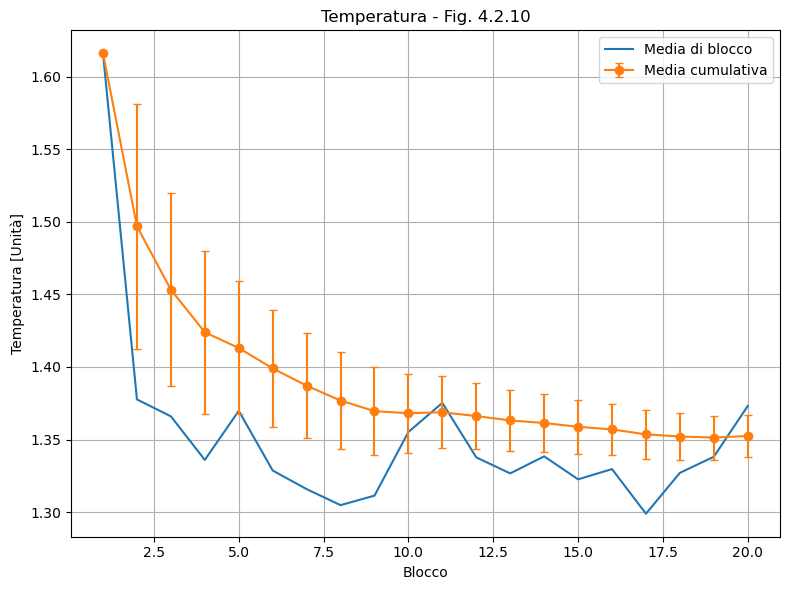

In [3]:
data = np.loadtxt("Esercizio_4_2/OUTPUT/temperature.dat")

x = data[:, 0]       # Progressione blocchi
y1 = data[:, 1]      # Media di blocco
y2 = data[:, 2]      # Media cumulativa dei blocchi
err_y2 = data[:, 3]  # Errore associato alla media cumulativa

# Crea il grafico
plt.figure(figsize=(8, 6))

# Linea per la media cumulativa
plt.plot(x, y1, label='Media di blocco', linestyle='-')

# Punti con barra d'errore e linea per la media di blocco
plt.errorbar(x, y2, yerr=err_y2, fmt='o-', capsize=3, label='Media cumulativa')

# Etichette e leggenda
plt.xlabel("Blocco")
plt.ylabel("Temperatura [Unità]")
plt.title("Temperatura - Fig. 4.2.10")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

### Osservazioni
Come prima cosa si nota che la distribuzione di partenza dei moduli delle velocità è piccata rispetto al centro imposto (ovvero una distribuzione a delta) e che attraverso la fase fuori dall'equilibrio le particelle evolvono verso la distribuzione di MW.

Stessa osservazione la si può fare per i grafici delle grandezze fisiche. Una prima fase transitoria che evolve fortemente fuori dai valori iniziali è susseguita da una fase di lievi fluttuazioni. In particolare l'energia cinetica e l'energia potenziale delle particelle hanno comportamento opposto in modo da avere valori statisticamente compatibili di energia totale, mostrando che in una simulazione di un ensemble microcanonico l'energia totale è conservata.


### Conclusione

La simulazione descrive bene come evolve un sistema perché mostra come questo, partendo da una configurazione a bassa entropia, evolve verso una configurazione ad alta entropia, esattamente come si comportano i sistemi reali. Il sistema si termalizza esattamente come si termalizzerebbe un sistema reale. Si noti anche come la temperatura e l'energia cinetica della simulazione siano legate e coerenti con la formula termodinamica $K^*$ = $\frac{3}{2}T^*$, infatti i valori finali di $T^*$ e di $K^*$ sono $T^* \approx 1.4$ e $K^* \approx 2.1$

---

# Esercizio 4.3

## Obiettivo dell'esercizio

Nell'ultima parte della lezione quattro si va a provare a ricostruire la simulazione dell'esercizio 4.2 a partire dalla configurazione finale.


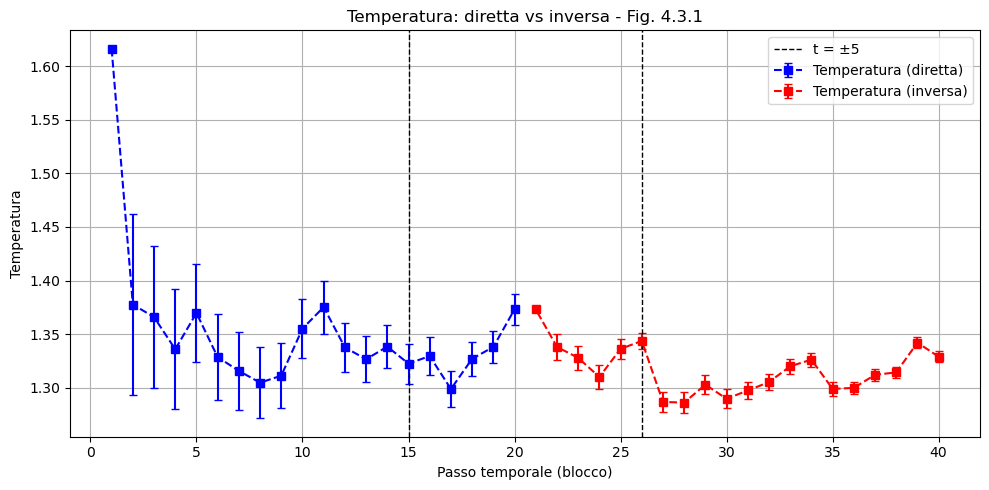

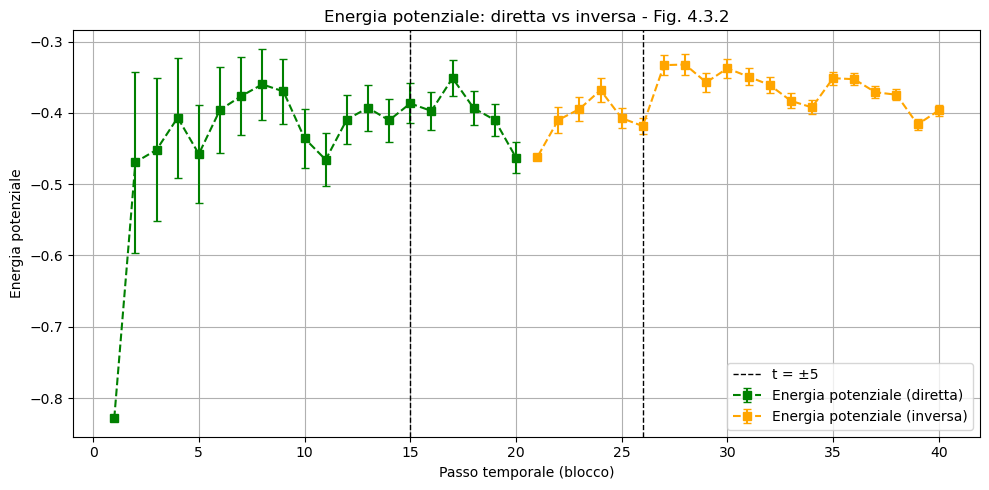

In [3]:
def load_data(path):
    data = np.loadtxt(path)
    x = data[:, 0]
    y_block = data[:, 1]
    y_cum = data[:, 2]
    y_err = data[:, 3]
    return x, y_block, y_cum, y_err

# Percorsi file
dir_temp = "Esercizio_4_2/OUTPUT/temperature.dat"
dir_pot  = "Esercizio_4_2/OUTPUT/potential_energy.dat"
inv_temp = "Esercizio_4_3/OUTPUT/temperature.dat"
inv_pot  = "Esercizio_4_3/OUTPUT/potential_energy.dat"

# Carica simulazione diretta
x_dir, T_dir, _, T_err_dir = load_data(dir_temp)
_, U_dir, _, U_err_dir = load_data(dir_pot)

# Carica simulazione inversa
x_inv_raw, T_inv_raw, _, T_err_inv_raw = load_data(inv_temp)
_, U_inv_raw, _, U_err_inv_raw = load_data(inv_pot)

# Numero di blocchi
n = len(x_dir)

# Inversione dati fisici (così la simulazione inversa "va indietro")
T_inv = T_inv_raw[::-1]
T_err_inv = T_err_inv_raw[::-1]
U_inv = U_inv_raw[::-1]
U_err_inv = U_err_inv_raw[::-1]

# Costruisci l'asse x: inverso da n a 1
x_inv = np.arange(n, 0, -1)

# --- PLOT TEMPERATURA ---
plt.figure(figsize=(10, 5))
plt.errorbar(x_dir, T_dir, yerr = T_err_dir, fmt='s--', capsize=3,
             label='Temperatura (diretta)', color='blue')
plt.errorbar(x_inv + 20, T_inv, yerr = T_err_inv, fmt='s--', capsize=3,
             label='Temperatura (inversa)', color='red')

# Linee verticali tratteggiate
plt.axvline(15, color='black', linestyle='--', linewidth=1, label='t = ±5')
plt.axvline(26, color='black', linestyle='--', linewidth=1)

plt.xlabel('Passo temporale (blocco)')
plt.ylabel('Temperatura')
plt.title('Temperatura: diretta vs inversa - Fig. 4.3.1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- PLOT ENERGIA POTENZIALE ---
plt.figure(figsize=(10, 5))
plt.errorbar(x_dir, U_dir, yerr=U_err_dir, fmt='s--', capsize=3,
             label='Energia potenziale (diretta)', color='green')
plt.errorbar(x_inv + 20, U_inv, yerr=U_err_inv, fmt='s--', capsize=3,
             label='Energia potenziale (inversa)', color='orange')

# Linee verticali tratteggiate
plt.axvline(15, color='black', linestyle='--', linewidth=1, label='t = ±5')
plt.axvline(26, color='black', linestyle='--', linewidth=1)

plt.xlabel('Passo temporale (blocco)')
plt.ylabel('Energia potenziale')
plt.title('Energia potenziale: diretta vs inversa - Fig. 4.3.2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Osservazioni

Quello che ho fatto è simulare il sistema direttamente per 20 blocchi e per 20 blocchi inversamente. Nella simulazione forward sono stati presi blocchi non fino all'equilibrio per mettere in evidenza la non reversibilità di Verlet che ci si aspetta teoricamente. E' più evidente la parziale simmetria temporale se nella backward simulation non si parte da una situazione di equilibrio (come in questo caso).

Inoltre ho evidenziato il range di evoluzione diretta-inversa entro al quale vale la reversibilità.

Quello che ci si dovrebbe aspettare dal tipo di simulazione è che si presenti perfetta reversibilità. Questo infatti perchè l'algoritmo di Verlet è time-reversible e le equazioni di Newton sono invarianti rispetto all'inversione temporale quando sul sistema agiscono forze conservative, come in questo caso. Il motivo dello scarto tra teoria e pratica è attribuibile principalmente agli errori di arrotondamento numerico introdotti a ogni passo temporale, che si accumulano progressivamente. Tali errori, seppur minimi localmente, si propagano esponenzialmente e impediscono al sistema di ripercorrere esattamente la traiettoria originaria quando il tempo viene invertito. Ciò dimostra che la simmetria temporale è solo parzialmente preservata in simulazioni numeriche e che, nella pratica computazionale, anche sistemi teoricamente reversibili evolvono verso stati statisticamente più probabili, cioè di maggiore entropia, evidenziando una freccia del tempo emergente.